<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None
            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000
RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


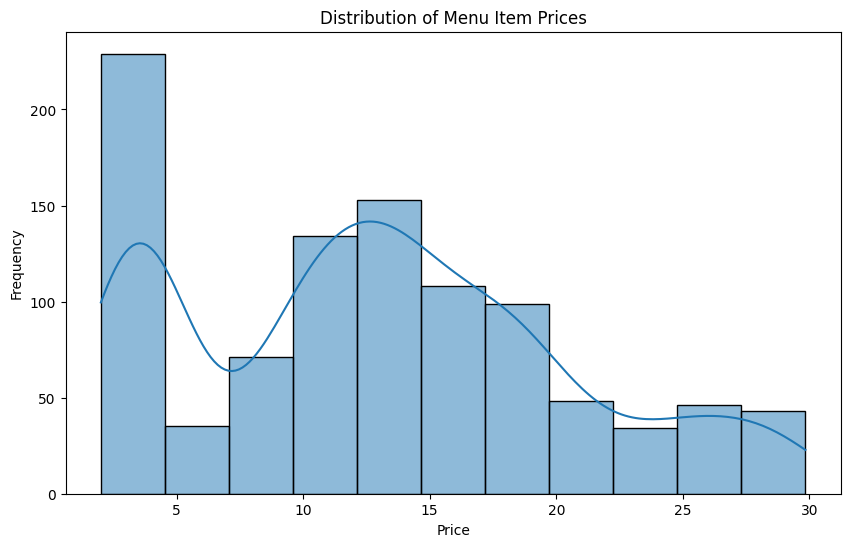

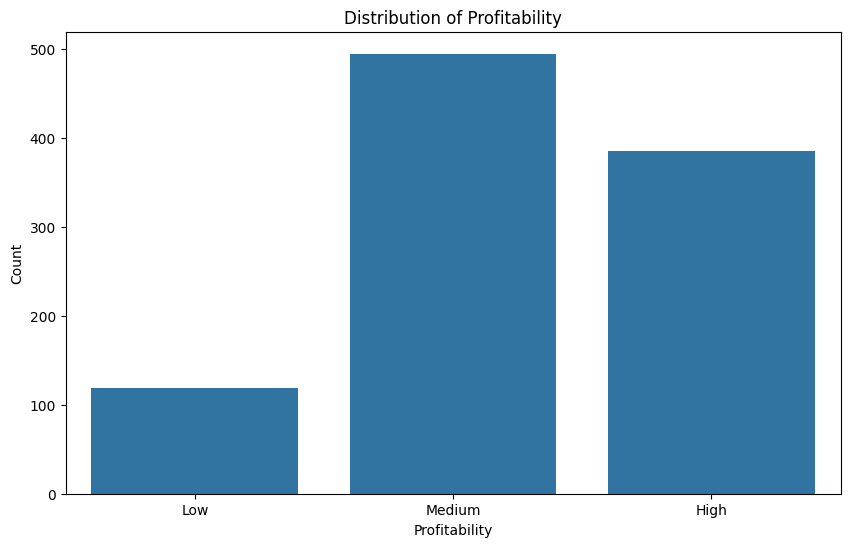

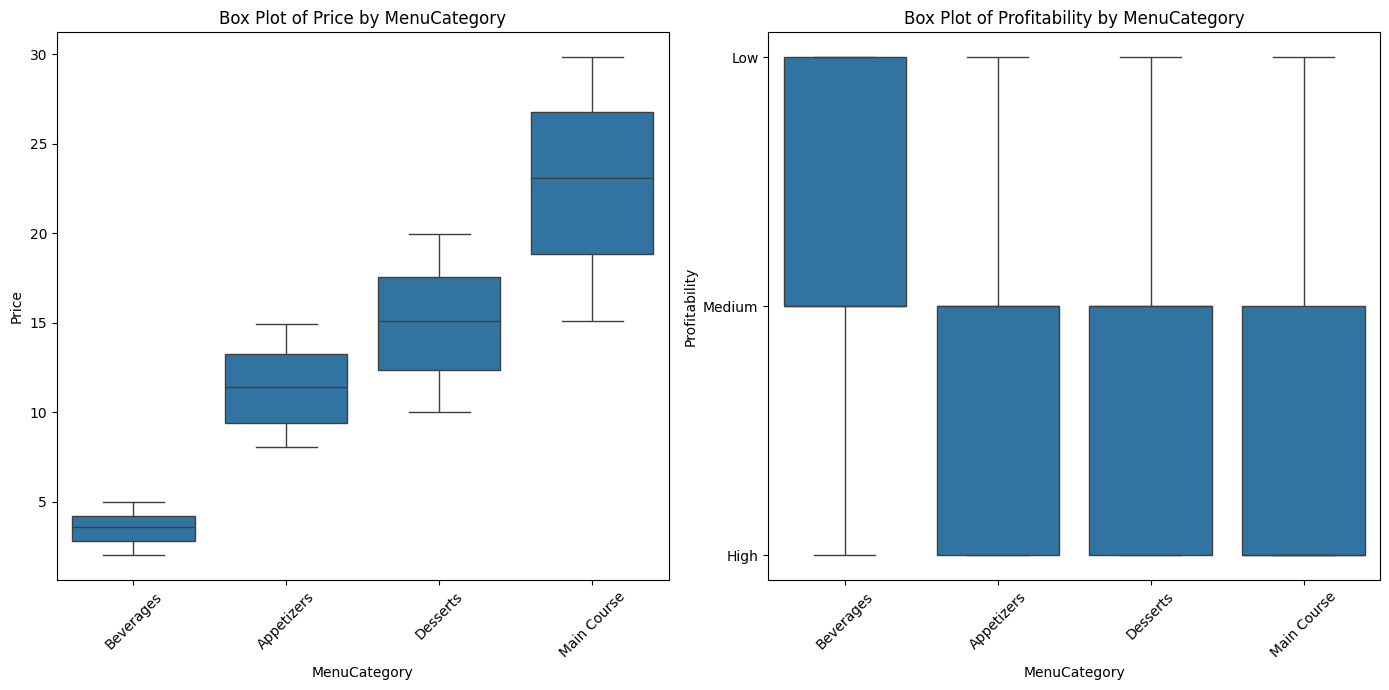

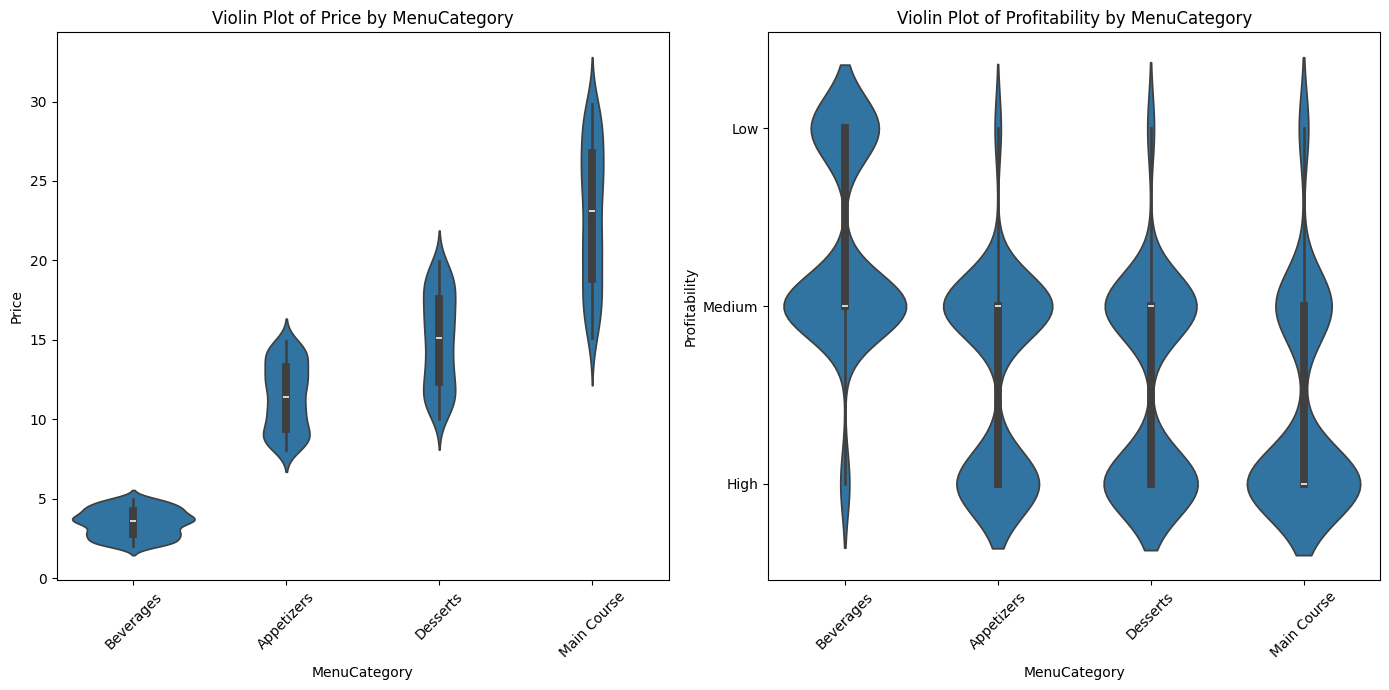

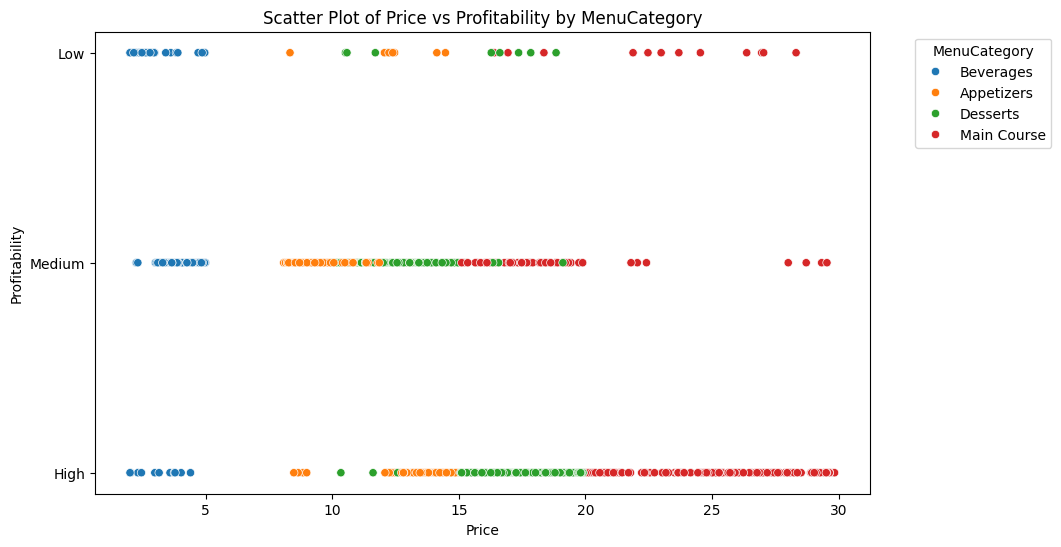

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\USER\OneDrive\Documents\Tugas&materi\Kuliah\Sem4\MPML\UAS\restaurant_menu_optimization_data.csv"

data = pd.read_csv(file_path)

# Data overview
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Menu Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize Profitability distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Profitability', data=data)
plt.title('Distribution of Profitability')
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.show()

# Box Plot for Price and Profitability by MenuCategory
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='MenuCategory', y='Price')
plt.title('Box Plot of Price by MenuCategory')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='MenuCategory', y='Profitability')
plt.title('Box Plot of Profitability by MenuCategory')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Violin Plot for Price and Profitability by MenuCategory
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.violinplot(data=data, x='MenuCategory', y='Price')
plt.title('Violin Plot of Price by MenuCategory')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(data=data, x='MenuCategory', y='Profitability')
plt.title('Violin Plot of Profitability by MenuCategory')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Scatter Plot for Price vs Profitability with MenuCategory as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Profitability', hue='MenuCategory')
plt.title('Scatter Plot of Price vs Profitability by MenuCategory')
plt.xlabel('Price')
plt.ylabel('Profitability')
plt.legend(title='MenuCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling categorical variables
label_encoder = LabelEncoder()
data['RestaurantID'] = label_encoder.fit_transform(data['RestaurantID'])
data['MenuCategory'] = label_encoder.fit_transform(data['MenuCategory'])
data['MenuItem'] = label_encoder.fit_transform(data['MenuItem'])
data['Profitability'] = label_encoder.fit_transform(data['Profitability'])

# Feature scaling
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

# Display the first few rows of the processed data
print(data.head())


   RestaurantID  MenuCategory  MenuItem  \
0             2             1        11   
1             0             0        12   
2             2             2         9   
3             2             3         2   
4             1             3         6   

                                         Ingredients     Price  Profitability  
0                                   ['confidential'] -1.385057              1  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil'] -0.229045              2  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  0.788029              0  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  2.256986              0  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  0.662581              2  


In [26]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data[['RestaurantID', 'MenuCategory', 'MenuItem', 'Price']]
y = data['Profitability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

# Train models
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC()

In [28]:
# Make predictions
log_reg_pred = log_reg.predict(X_test)
tree_clf_pred = tree_clf.predict(X_test)
svm_clf_pred = svm_clf.predict(X_test)

# Evaluate models
log_reg_acc = accuracy_score(y_test, log_reg_pred)
tree_clf_acc = accuracy_score(y_test, tree_clf_pred)
svm_clf_acc = accuracy_score(y_test, svm_clf_pred)

log_reg_prec = precision_score(y_test, log_reg_pred, average='weighted')
tree_clf_prec = precision_score(y_test, tree_clf_pred, average='weighted')
svm_clf_prec = precision_score(y_test, svm_clf_pred, average='weighted')

log_reg_recall = recall_score(y_test, log_reg_pred, average='weighted')
tree_clf_recall = recall_score(y_test, tree_clf_pred, average='weighted')
svm_clf_recall = recall_score(y_test, svm_clf_pred, average='weighted')

log_reg_f1 = f1_score(y_test, log_reg_pred, average='weighted')
tree_clf_f1 = f1_score(y_test, tree_clf_pred, average='weighted')
svm_clf_f1 = f1_score(y_test, svm_clf_pred, average='weighted')

# Print evaluation metrics
print(f"Logistic Regression: Accuracy = {log_reg_acc}, Precision = {log_reg_prec}, Recall = {log_reg_recall}, F1 Score = {log_reg_f1}")
print(f"Decision Tree: Accuracy = {tree_clf_acc}, Precision = {tree_clf_prec}, Recall = {tree_clf_recall}, F1 Score = {tree_clf_f1}")
print(f"SVM: Accuracy = {svm_clf_acc}, Precision = {svm_clf_prec}, Recall = {svm_clf_recall}, F1 Score = {svm_clf_f1}")

Logistic Regression: Accuracy = 0.78, Precision = 0.6861083795376085, Recall = 0.78, F1 Score = 0.728508956796628
Decision Tree: Accuracy = 0.83, Precision = 0.8272552850444365, Recall = 0.83, F1 Score = 0.8281052930710685
SVM: Accuracy = 0.705, Precision = 0.6310370370370371, Recall = 0.705, F1 Score = 0.6563065949344132


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
import joblib

# Save the decision tree model
joblib.dump(tree_clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [30]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {
    "MenuCategory": [1],
    "Price": [-1.385057]
}

response = requests.post(url, json=data)
print(response.json())

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001EF001FC770>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))